In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import r2_score
import missingno as msno
from tqdm import tqdm_notebook

## Load Dateset

In [228]:
df=pd.read_csv('delivery.txt')
df['DELIVERY_DATE']=pd.to_datetime(df['DELIVERY_DATE'])
df=df.set_index('DELIVERY_DATE')

## Missing Value

'/usr/local/share/datasets/matrix_sorted.png'

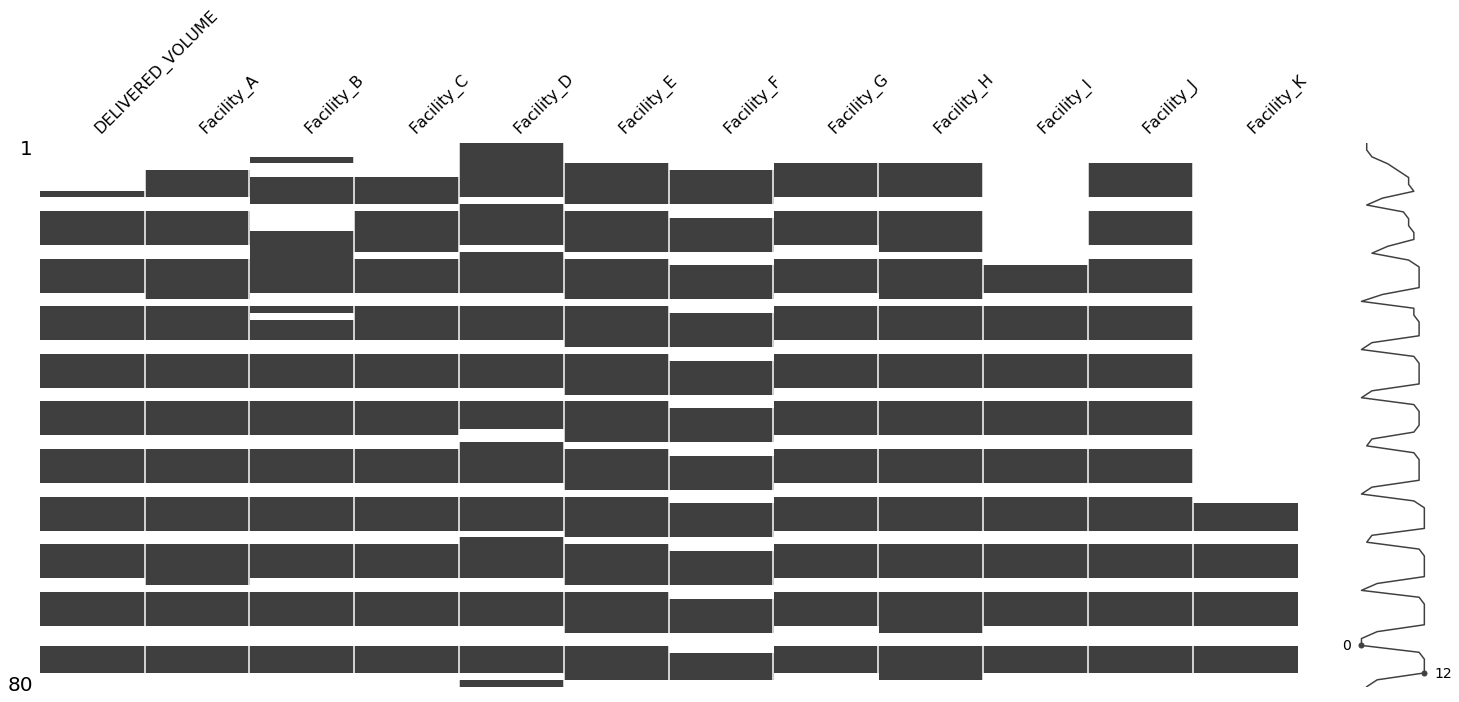

In [229]:
import missingno as msno

# Sort diabetes dataframe on 'Serum_Insulin'
sorted_values = df

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sorted.png")

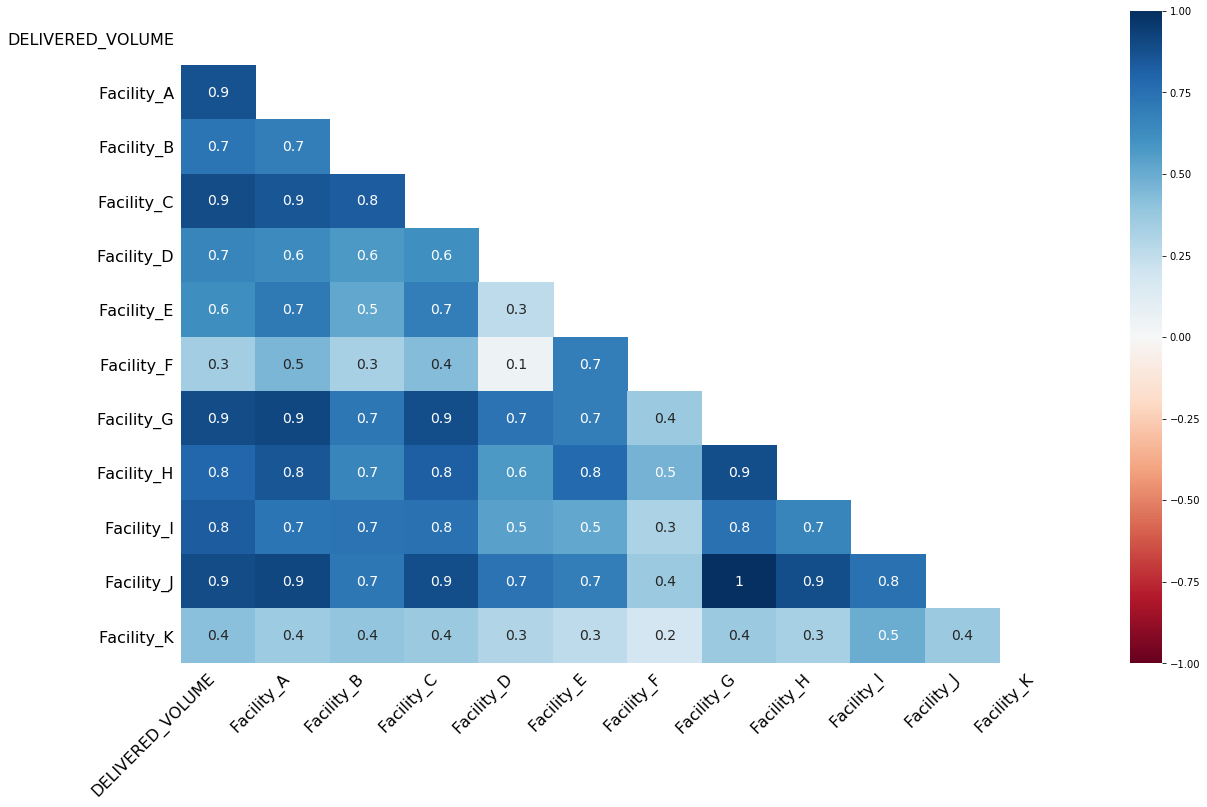

In [230]:
msno.heatmap(df)

# Show plot
plt.show()

## Forward Filling

In [87]:
df=df.fillna(method='ffill', inplace=True)

# df_ff=df_ff.set_index('DELIVERY_DATE')
# fig, ax = plt.subplots(figsize=(14,5))
# df_ff['DELIVERED_VOLUME'].plot()

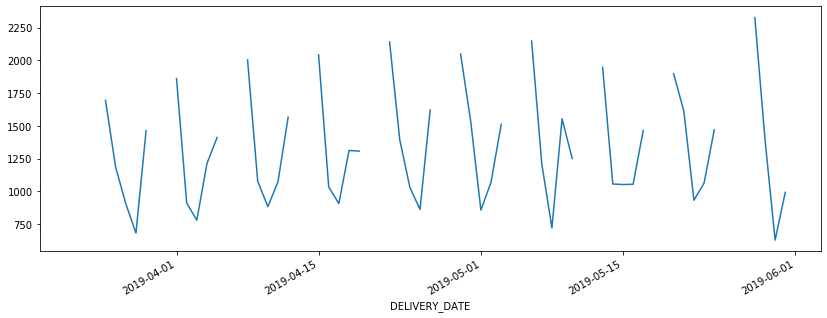

In [90]:
df=df.set_index('DELIVERY_DATE')
fig, ax = plt.subplots(figsize=(14,5))
df['DELIVERED_VOLUME'].plot()

## Median

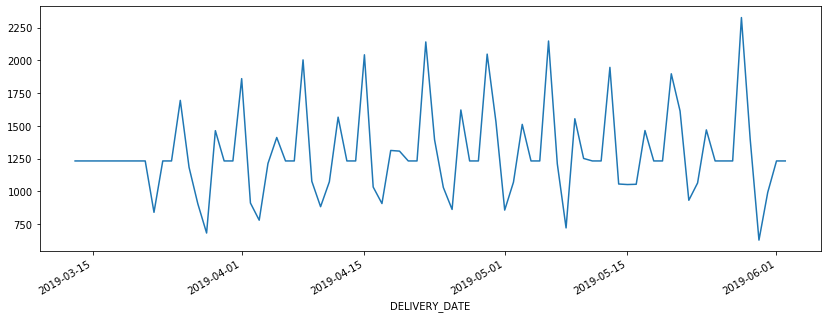

In [231]:
df_med=df.fillna(df.median())
fig, ax = plt.subplots(figsize=(14,5))
df_med['DELIVERED_VOLUME'].plot()

## Mean

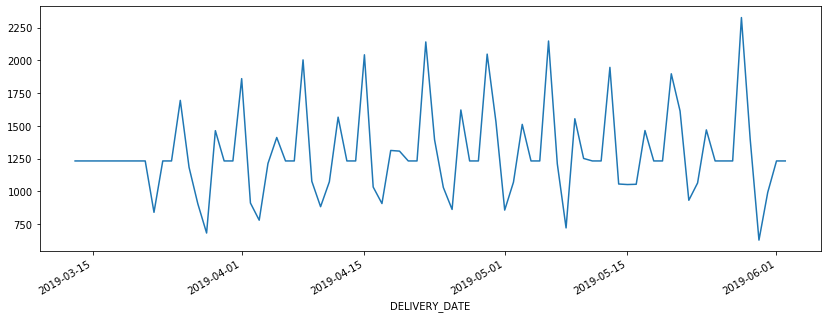

In [272]:
df_mean=df.fillna(df.mean())
fig, ax = plt.subplots(figsize=(14,5))
df_mean['DELIVERED_VOLUME'].plot()

## Mode

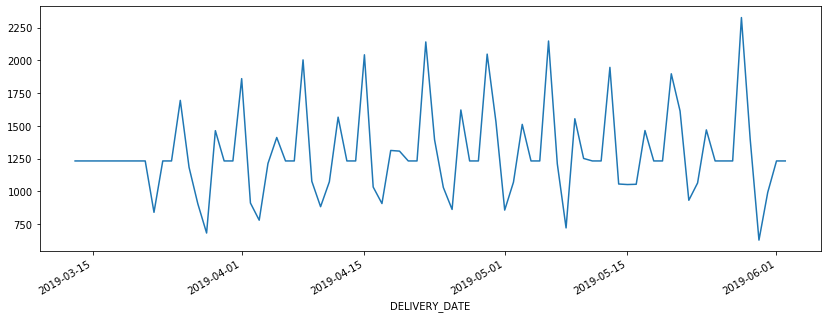

In [271]:
df_mode=df.fillna(df.mode())
fig, ax = plt.subplots(figsize=(14,5))
df_mode['DELIVERED_VOLUME'].plot()

## There Is Seaonality, But No Trend
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
<br/>Level: The average value in the series.
<br/>Trend: The increasing or decreasing value in the series.
<br/>Seasonality: The repeating short-term cycle in the series.
<br/>Noise: The random variation in the series.

In [134]:
df=df_med.reset_index()
df['weekend']=np.where(df['DELIVERY_DATE'].dt.weekday<5,0,1)
df['day_of_week']=df['DELIVERY_DATE'].dt.weekday
df['day_of_month']=df['DELIVERY_DATE'].dt.day
df['day_of_year']=(df['DELIVERY_DATE']-datetime.datetime.strptime('01/01/2019',"%d/%m/%Y")).astype('timedelta64[D]')

In [164]:
df.columns

Index(['DELIVERED_VOLUME', 'Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K'],
      dtype='object')

In [172]:
df.head()

,DELIVERED_VOLUME,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K
DELIVERY_DATE,,,,,,,,,,,,
2019-03-13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-14,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-15,NaN,NaN,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-18,NaN,NaN,NaN,NaN,55.0,3.0,NaN,45.0,86.0,NaN,16.0,NaN
2019-03-19,NaN,13.0,NaN,NaN,3.0,9.0,80.0,243.0,80.0,NaN,6.0,NaN


In [232]:
df=df_med

## Check Stationarity
Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.
<br/>Definition of stationarity:
<br/>constant mean
<br/>constant variance
<br/>an autocovariance that does not depend on time.

Text(0.5, 1.0, 'Mean')

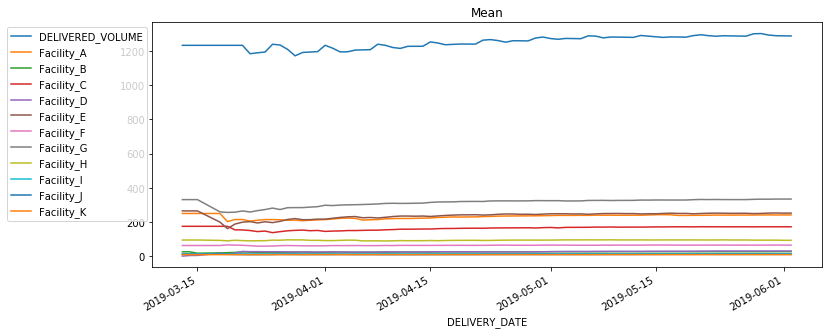

In [233]:
# df=df.set_index('DELIVERY_DATE')
df2=df.expanding().mean()

df2.plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
plt.title('Mean')

Text(0.5, 1.0, 'Variance')

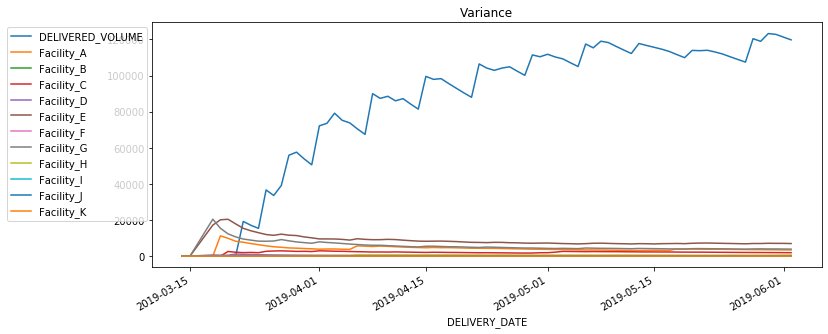

In [175]:
df2=df.expanding().var()

df2.plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
plt.title('Variance')

## Dickey-Fuller Test For Stationary
Non-Stationary: H,J,day_of_month,day_of_year

In [239]:
from statsmodels.tsa.stattools import adfuller

def df_test(data):

    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


for colname in df.columns:
    print(colname)
    data=df[colname].values
    df_test(data)

DELIVERED_VOLUME
ADF Statistic: -1.689629
p-value: 0.436464
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Facility_A
ADF Statistic: -5.405031
p-value: 0.000003
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587
Facility_B
ADF Statistic: -6.525157
p-value: 0.000000
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587
Facility_C
ADF Statistic: -10.975119
p-value: 0.000000
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587
Facility_D
ADF Statistic: -5.562093
p-value: 0.000002
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587
Facility_E
ADF Statistic: -4.726672
p-value: 0.000075
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
Facility_F
ADF Statistic: -3.174826
p-value: 0.021489
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
Facility_G
ADF Statistic: -3.844900
p-value: 0.002480
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589
Facility_H
ADF Statistic: -1.416861
p-value: 0.574166
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
Facility_I
ADF Statis

## Transformations

In [238]:
df['DELIVERED_VOLUME_t']=df['DELIVERED_VOLUME'].expanding().mean()

In [240]:
df_test(df['Facility_J'].expanding().mean())

ADF Statistic: -0.843781
p-value: 0.805922
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


In [236]:
df.columns

Index(['DELIVERED_VOLUME', 'Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K', 'DELIVERED_VOLUME_t'],
      dtype='object')

## Understanding Time Series

In [177]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [241]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['DELIVERED_VOLUME'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1363.0523918685935
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1110.1920629471992
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1041.7490923869668
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:826.4094575958023
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1056.0147563480537
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1008.8304449060505
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:854.8605681122036
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:825.9328742627399
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1276.2793107278796
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1061.3265629449422
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1027.2557126010065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:814.7303421246382
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1055.9083942987668
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:996.6742433766341
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:855.6252630630579
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:813.849050556839
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1191.559498600457
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1013.3707015866038
A

### ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:799.143502598055 is the best

In [242]:
mod = sm.tsa.statespace.SARIMAX(df['DELIVERED_VOLUME'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001     61.802     -0.016      0.987    -122.130     120.130
ar.S.L12      -0.3178      0.162     -1.966      0.049      -0.635      -0.001
ma.S.L12      -1.0009     61.785     -0.016      0.987    -122.097     120.096
sigma2       1.26e+05      0.000   3.68e+08      0.000    1.26e+05    1.26e+05


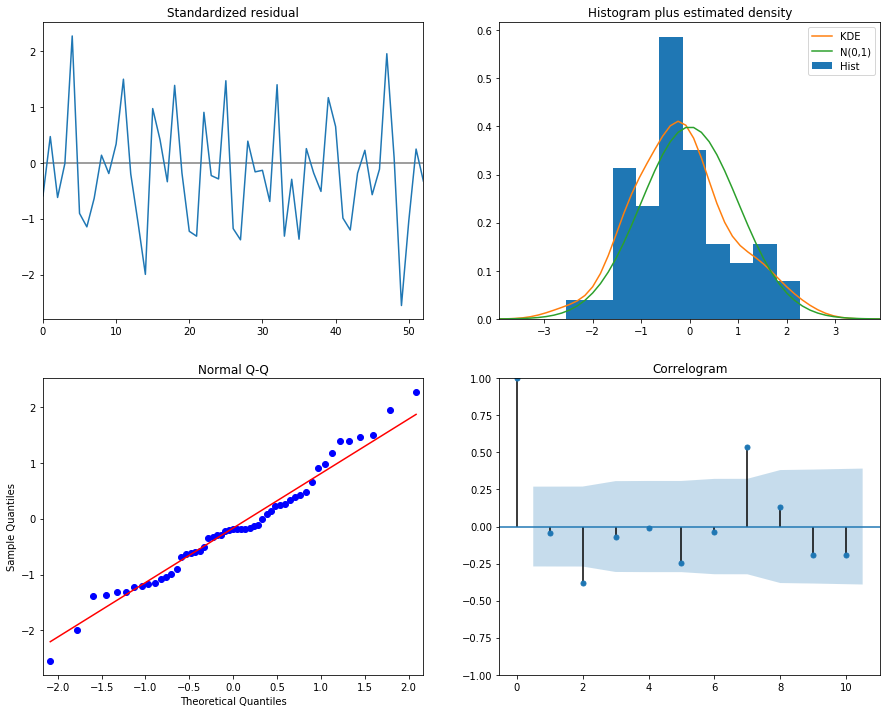

In [180]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [243]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-15'), dynamic=False)
pred_ci = pred.conf_int()

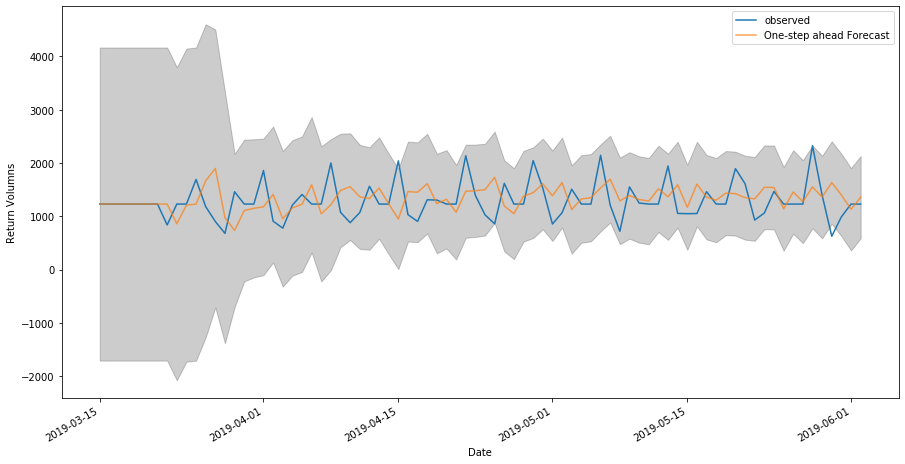

In [198]:
ax = df['DELIVERED_VOLUME']['2019-3-15':].plot(label='observed',figsize=(15, 8))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Return Volumns')
plt.legend()

plt.show()

## Base Line Model Prediction

In [244]:
results.forecast(5)

80    1324.786455
81    1496.006286
82    1455.380892
83    1385.871029
84    1361.447606
dtype: float64

## Model 2: Multivariate Time Series + Supervised Model
1.Used VAR to forecast the number of returns in each facility in the next 5 days
<br/>2.Train supervised model with # of returns,date time features

In [245]:
from statsmodels.tsa.api import VAR

In [246]:
train=df.iloc[:,1:]
train

,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K,DELIVERED_VOLUME_t
DELIVERY_DATE,,,,,,,,,,,,
2019-03-13,250.0,26.0,175.0,1.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,1232.000000
2019-03-14,250.0,26.0,175.0,8.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,1232.000000
2019-03-15,250.0,1.0,175.0,6.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,1232.000000
2019-03-18,250.0,26.0,175.0,55.0,3.0,63.0,45.0,86.0,14.0,16.0,9.5,1232.000000
2019-03-19,13.0,26.0,175.0,3.0,9.0,80.0,243.0,80.0,14.0,6.0,9.5,1232.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-29,284.0,36.0,206.0,46.0,328.0,79.0,414.0,69.0,14.0,10.0,8.0,1300.763158
2019-05-30,264.0,21.0,179.0,9.0,382.0,71.0,311.0,104.0,9.0,12.0,8.0,1292.025974
2019-05-31,208.0,52.0,163.0,48.0,312.0,79.0,401.0,109.0,8.0,8.0,10.0,1288.179487


In [247]:
model=VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=5)
print(pred)

[[ 251.06563211   26.9346356   181.63244403   38.43828082  252.75454549
    70.04430066  354.36365275   93.98944619   13.93941564   13.07943145
     9.32235795 1288.84965348]
 [ 253.11307176   30.29252642  185.08192827   37.02868176  274.68892595
    67.30741127  343.07503354   92.59262182   14.67862808   12.30297031
     9.73681495 1287.0409244 ]
 [ 248.86221985   28.90095842  181.92662866   36.36290591  267.63806003
    67.75334622  345.76014557   93.79672198   14.42571349   12.63120206
     9.44796512 1284.96944694]
 [ 248.22849459   29.1836451   182.13179192   36.33872218  267.40111617
    67.02174356  343.45168871   93.45693827   14.43078606   12.38999184
     9.55487497 1283.33928773]
 [ 247.39882319   28.79486801  180.93903991   36.08121238  265.634025
    67.07806139  343.21407083   93.23675883   14.4525294    12.38063836
     9.52694737 1281.68994283]]


## Appending Facility Prediction To DF

In [248]:
df2=df.reset_index()

In [249]:
# df2=df.reset_index().drop(['DELIVERED_VOLUME','DELIVERY_DATE'],axis=1)

In [250]:
drange=pd.date_range(start='2019-06-03',end='2019-06-07')

for i in range(5):
    zipp=dict(zip(['Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K'],pred[i]))
    zipp['DELIVERY_DATE']=drange[i]
    
    df2=df2.append(zipp,ignore_index=True)
    
    
df2['weekend']=np.where(df2['DELIVERY_DATE'].dt.weekday<5,0,1)
df2['day_of_week']=df2['DELIVERY_DATE'].dt.weekday
df2['day_of_month']=df2['DELIVERY_DATE'].dt.day
df2['day_of_year']=(df2['DELIVERY_DATE']-datetime.datetime.strptime('01/01/2019',"%d/%m/%Y")).astype('timedelta64[D]')

In [251]:
df2.head()

,DELIVERY_DATE,DELIVERED_VOLUME,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K,DELIVERED_VOLUME_t,weekend,day_of_week,day_of_month,day_of_year
0,2019-03-13,1232.0,250.0,26.0,175.0,1.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,1232.0,0,2,13,71.0
1,2019-03-14,1232.0,250.0,26.0,175.0,8.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,1232.0,0,3,14,72.0
2,2019-03-15,1232.0,250.0,1.0,175.0,6.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,1232.0,0,4,15,73.0
3,2019-03-18,1232.0,250.0,26.0,175.0,55.0,3.0,63.0,45.0,86.0,14.0,16.0,9.5,1232.0,0,0,18,76.0
4,2019-03-19,1232.0,13.0,26.0,175.0,3.0,9.0,80.0,243.0,80.0,14.0,6.0,9.5,1232.0,0,1,19,77.0


In [252]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [253]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

reg = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [254]:
df2.columns

Index(['DELIVERY_DATE', 'DELIVERED_VOLUME', 'Facility_A', 'Facility_B',
       'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G',
       'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K',
       'DELIVERED_VOLUME_t', 'weekend', 'day_of_week', 'day_of_month',
       'day_of_year'],
      dtype='object')

In [255]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df['DELIVERY_DATE']
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
 

    
    X = df[['Facility_A',
       'Facility_B', 'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F',
       'Facility_G', 'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekend']]
    if label:
        y = df[label]
        return X, y
    return X

In [256]:
split_date = '2019-05-15'
df_train =df2.loc[df2['DELIVERY_DATE'] <= split_date].copy()
df_test = df2.loc[df2['DELIVERY_DATE']> split_date].copy()

X_train, y_train = create_features(df_train, label='DELIVERED_VOLUME')
X_test, y_test = create_features(df_test, label='DELIVERED_VOLUME')

In [257]:
X_test=X_test.fillna(X_test.mean())
y_test=y_test.fillna(y_train.mean())

## XG Boost

In [258]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[22:00:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

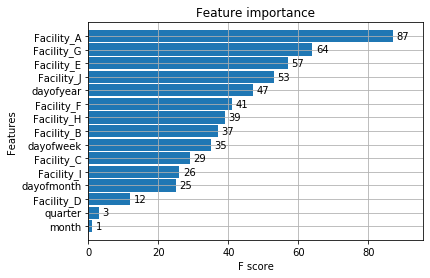

In [259]:
_ = plot_importance(reg, height=0.9)

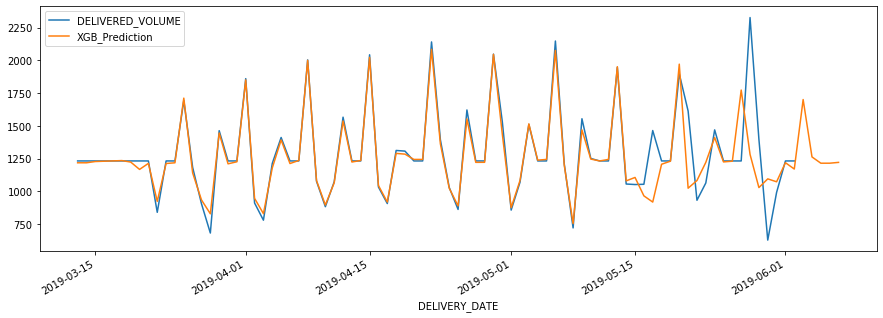

In [260]:
df_train['XGB_Prediction'] = reg.predict(X_train)
df_test['XGB_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)
df_all=df_all.set_index('DELIVERY_DATE')
_ = df_all[['DELIVERED_VOLUME','XGB_Prediction']].plot(figsize=(15, 5))

## Prediction

In [265]:
reg.predict(X_test[-4:])

array([1262.6847, 1214.7866, 1214.7866, 1221.0281], dtype=float32)

## Random Forest

In [266]:
from sklearn.ensemble.forest import RandomForestRegressor
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
rgr=RF_Model.fit(X_train, y_train)

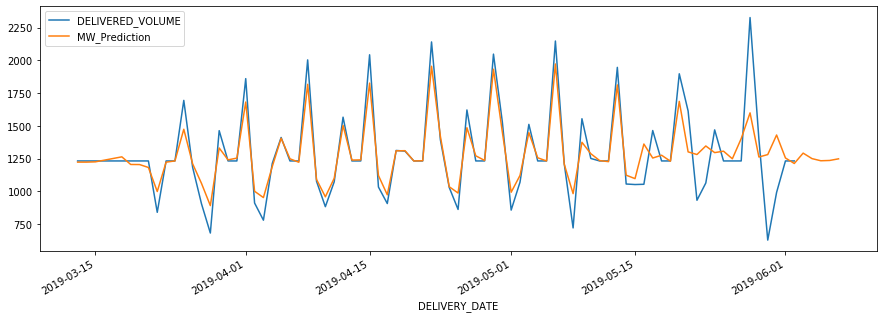

In [267]:
rgr.predict(X_test)
df_train['MW_Prediction'] = rgr.predict(X_train)
df_test['MW_Prediction'] = rgr.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)
df_all=df_all.set_index('DELIVERY_DATE')
_ = df_all[['DELIVERED_VOLUME','MW_Prediction']].plot(figsize=(15, 5))

## Prediction

In [268]:
reg.predict(X_test[-4:])

array([1262.6847, 1214.7866, 1214.7866, 1221.0281], dtype=float32)

## Model 3: Lag + Supervised Model

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-05-15'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

y_forecasted = pred_dynamic.predicted_mean
y_truth = df['DELIVERED_VOLUME']['2019-05-15':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
pred = results.forecast(5)

In [ ]:
df['day_of_year']

In [ ]:
df['date']=df.index

In [ ]:
df.columns

In [ ]:
train=df[]

In [ ]:
df[:]

In [ ]:
model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR